#Dataset 01) LA Fire Data

In [ ]:
import pandas as pd
import numpy as np


In [ ]:
df_fire = pd.read_csv('/content/drive/MyDrive/Projects/LA_Fire_Prediction/Data/raw/LACoFD_Historic_Fire_Perimeters_(Feature_Layer).csv')
df_fire.head()

,OBJECTID_1,OBJECTID,YEAR,FIRE_NAME,GIS_ACRES,Shape_Leng,Shape__Area,Shape__Length
0,1,1,1966,CHARLIE,1316.470832,37718.242964,5.734524e+07,37718.242964
1,2,2,1966,LOOP,2143.143213,47193.953980,9.335494e+07,47193.953980
2,3,3,1966,THOMPSON,34.623950,8467.864256,1.508213e+06,8467.864256
3,4,4,1966,ROCKETDYNE,302.203561,19785.747545,1.316393e+07,19785.747545
4,5,5,1967,LYON,102.259007,8647.473013,4.454385e+06,8647.473013


In [ ]:
null_counts = df_fire.isnull().sum()

print(null_counts[null_counts > 0])

print(df_fire.info())


Series([], dtype: int64)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   OBJECTID_1     891 non-null    int64  
 1   OBJECTID       891 non-null    int64  
 2   YEAR           891 non-null    int64  
 3   FIRE_NAME      891 non-null    object 
 4   GIS_ACRES      891 non-null    float64
 5   Shape_Leng     891 non-null    float64
 6   Shape__Area    891 non-null    float64
 7   Shape__Length  891 non-null    float64
dtypes: float64(4), int64(3), object(1)
memory usage: 55.8+ KB
None


In [ ]:


print("Missing values before cleanup:")
print(df_fire.isnull().sum())

# Drop rows with no YEAR (required for proxy date)
df_fire = df_fire.dropna(subset=['YEAR'])

# Fill missing GIS_ACRES with 0 (optional)
df_fire['GIS_ACRES'] = df_fire['GIS_ACRES'].fillna(0)

# Ensure YEAR is integer
df_fire['YEAR'] = df_fire['YEAR'].astype(int)

# Step 3: Generate Proxy Ignition Dates
def random_fire_date(year):
    start = pd.Timestamp(f"{year}-05-01")
    end = pd.Timestamp(f"{year}-11-30")
    return start + pd.to_timedelta(np.random.randint(0, (end - start).days + 1), unit='D')

df_fire['IGNITION_DATE'] = df_fire['YEAR'].apply(random_fire_date)

# Step 4: Group by Date to Create Labels & Incorporate fix here!
df_fire['IGNITION_DATE'] = pd.to_datetime(df_fire['IGNITION_DATE'])
df_fire_daily = df_fire.groupby('IGNITION_DATE').size().reset_index(name='fire_count')


# **--- Start of Changes ---**
# Assuming full_dates is your full date range as a Pandas Series or Index
# Replace '2014-12-27' and '2024-12-31' with your actual start and end dates
full_dates = pd.date_range(start='2014-12-27', end='2024-12-31', freq='D')
full_dates_df = pd.DataFrame({'date': full_dates})

# Merge with fire data
fire_data_with_zeros = full_dates_df.merge(df_fire_daily, left_on='date', right_on='IGNITION_DATE', how='left')

# Fill missing values
fire_data_with_zeros['fire_count'] = fire_data_with_zeros['fire_count'].fillna(0).astype(int)
fire_data_with_zeros['Fire_Occurred'] = (fire_data_with_zeros['fire_count'] > 0).astype(int)

df_fire_daily = fire_data_with_zeros[['date','fire_count','Fire_Occurred']]

# **--- End of Changes ---**

# Step 5: Export
output_path = '/content/drive/MyDrive/Projects/LA_Fire_Prediction/Data/intermediate/1 - LA_Daily_Fire_Labels.csv'
df_fire_daily.to_csv(output_path, index=False)
print(f"Preprocessing complete. File saved to:\n{output_path}")

# Optional: Preview
df_fire_daily.head()

Missing values before cleanup:
OBJECTID_1       0
OBJECTID         0
YEAR             0
FIRE_NAME        0
GIS_ACRES        0
Shape_Leng       0
Shape__Area      0
Shape__Length    0
IGNITION_DATE    0
dtype: int64
Preprocessing complete. File saved to:
/content/drive/MyDrive/Projects/LA_Fire_Prediction/Data/intermediate/1 - LA_Daily_Fire_Labels.csv


,date,fire_count,Fire_Occurred
0,2014-12-27,0,0
1,2014-12-28,0,0
2,2014-12-29,0,0
3,2014-12-30,0,0
4,2014-12-31,0,0


In [ ]:
# Assuming df_fire_daily is already loaded

# Get labeled counts for 'fire_count'
fire_count_labels = df_fire_daily['fire_count'].value_counts().sort_index()
print("Labeled Counts for 'fire_count':")
print(fire_count_labels)

# Get labeled counts for 'Fire_Occurred'
fire_occurred_labels = df_fire_daily['Fire_Occurred'].value_counts().sort_index()
print("\nLabeled Counts for 'Fire_Occurred':")
print(fire_occurred_labels)

Labeled Counts for 'fire_count':
fire_count
0    3418
1     228
2      12
Name: count, dtype: int64

Labeled Counts for 'Fire_Occurred':
Fire_Occurred
0    3418
1     240
Name: count, dtype: int64


In [ ]:
print(df_fire.columns)
df_fire.head()

Index(['OBJECTID_1', 'OBJECTID', 'YEAR', 'FIRE_NAME', 'GIS_ACRES',
       'Shape_Leng', 'Shape__Area', 'Shape__Length', 'IGNITION_DATE'],
      dtype='object')


,OBJECTID_1,OBJECTID,YEAR,FIRE_NAME,GIS_ACRES,Shape_Leng,Shape__Area,Shape__Length,IGNITION_DATE
0,1,1,1966,CHARLIE,1316.470832,37718.242964,5.734524e+07,37718.242964,1966-08-09
1,2,2,1966,LOOP,2143.143213,47193.953980,9.335494e+07,47193.953980,1966-08-30
2,3,3,1966,THOMPSON,34.623950,8467.864256,1.508213e+06,8467.864256,1966-10-14
3,4,4,1966,ROCKETDYNE,302.203561,19785.747545,1.316393e+07,19785.747545,1966-09-05
4,5,5,1967,LYON,102.259007,8647.473013,4.454385e+06,8647.473013,1967-06-22


##EDA for LA Fire dataset

🔍 Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3658 entries, 0 to 3657
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   date           3658 non-null   datetime64[ns]
 1   fire_count     3658 non-null   int64         
 2   Fire_Occurred  3658 non-null   int64         
 3   year           3658 non-null   int32         
 4   month          3658 non-null   int32         
 5   day_of_year    3658 non-null   int32         
 6   weekday        3658 non-null   object        
dtypes: datetime64[ns](1), int32(3), int64(2), object(1)
memory usage: 157.3+ KB
None

📊 Summary Stats:
                       date   fire_count  Fire_Occurred         year  \
count                  3658  3658.000000    3658.000000  3658.000000   
unique                  NaN          NaN            NaN          NaN   
top                     NaN          NaN            NaN          NaN   
freq                    NaN

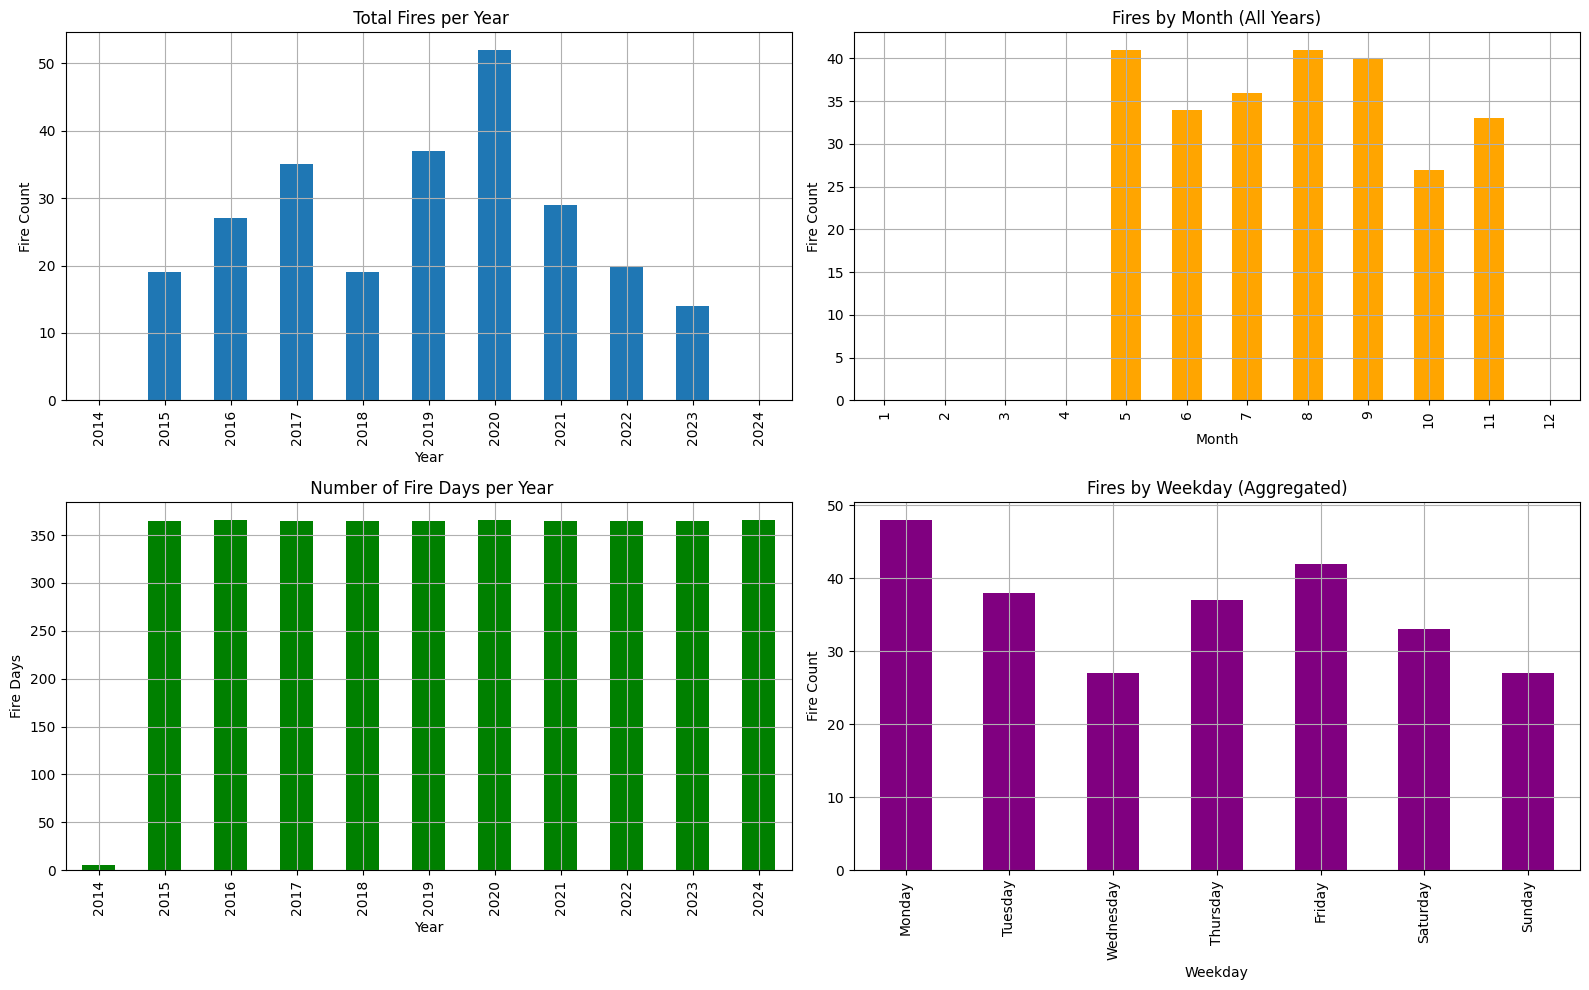

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load fire label dataset
file_path = '/content/drive/MyDrive/Projects/LA_Fire_Prediction/Data/intermediate/1 - LA_Daily_Fire_Labels.csv'
df = pd.read_csv(file_path)

# Parse date column
df['date'] = pd.to_datetime(df['date'])

# Feature engineering
df['year'] = df['date'].dt.year
df['month'] = df['date'].dt.month
df['day_of_year'] = df['date'].dt.dayofyear
df['weekday'] = df['date'].dt.day_name()

# Quick data summary
print("🔍 Dataset Info:")
print(df.info())
print("\n📊 Summary Stats:")
print(df.describe(include='all'))

# Grouping for visualizations
fires_per_year = df.groupby('year')['fire_count'].sum()
fires_by_month = df.groupby('month')['fire_count'].sum()
fire_days_per_year = df.groupby('year').size()
fires_by_weekday = df.groupby('weekday')['fire_count'].sum().reindex([
    'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'
])

# Visualization
plt.figure(figsize=(16, 10))

plt.subplot(2, 2, 1)
fires_per_year.plot(kind='bar')
plt.title(' Total Fires per Year')
plt.xlabel('Year')
plt.ylabel('Fire Count')
plt.grid(True)

plt.subplot(2, 2, 2)
fires_by_month.plot(kind='bar', color='orange')
plt.title('Fires by Month (All Years)')
plt.xlabel('Month')
plt.ylabel('Fire Count')
plt.grid(True)

plt.subplot(2, 2, 3)
fire_days_per_year.plot(kind='bar', color='green')
plt.title(' Number of Fire Days per Year')
plt.xlabel('Year')
plt.ylabel('Fire Days')
plt.grid(True)

plt.subplot(2, 2, 4)
fires_by_weekday.plot(kind='bar', color='purple')
plt.title('Fires by Weekday (Aggregated)')
plt.xlabel('Weekday')
plt.ylabel('Fire Count')
plt.grid(True)

plt.tight_layout()
plt.show()


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


#2) GHC- Weather Dataset


In [ ]:
import pandas as pd

file1 = '/content/drive/MyDrive/Projects/LA_Fire_Prediction/Data/intermediate/2 - GHC Data/GHC Data 2015 - 2019.csv'
file2 = '/content/drive/MyDrive/Projects/LA_Fire_Prediction/Data/intermediate/2 - GHC Data/GHC Data 2020-2024.csv'

df1 = pd.read_csv(file1)
df2 = pd.read_csv(file2)

df_weather = pd.concat([df1, df2], ignore_index=True)
df_weather['DATE'] = pd.to_datetime(df_weather['DATE'], errors='coerce')

df_weather = df_weather.dropna(subset=['DATE'])
df_weather = df_weather.sort_values('DATE').reset_index(drop=True)


In [ ]:

for col in ['PRCP', 'SNOW', 'SNWD', 'AWND']:
    if col in df_weather.columns:
        df_weather[col] = df_weather[col].fillna(
            df_weather.groupby(df_weather['DATE'].dt.month)[col].transform('mean')
        )

print("Missing values after imputation:")
print(df_weather[['PRCP', 'SNOW', 'SNWD', 'AWND']].isnull().sum())


Missing values after imputation:
PRCP    0
SNOW    0
SNWD    0
AWND    0
dtype: int64


In [ ]:
df_weather['year'] = df_weather['DATE'].dt.year
df_weather['month'] = df_weather['DATE'].dt.month

In [ ]:
print("📈 Total rows:", len(df_weather))
print("📅 Date range:", df_weather['DATE'].min(), "→", df_weather['DATE'].max())


📈 Total rows: 225011
📅 Date range: 2015-01-01 00:00:00 → 2024-12-31 00:00:00


In [ ]:
df_weather.head()

,STATION,NAME,DATE,AWND,DAPR,MDPR,PGTM,PRCP,SNOW,SNWD,...,WT02,WT03,WT05,WT06,WT07,WT08,WT10,WT11,year,month
0,USW00023129,"LONG BEACH DAUGHERTY AIRPORT, CA US",2015-01-01,1.790000,NaN,NaN,NaN,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,2015,1
1,USW00023152,"BURBANK GLENDALE PASADENA AIRPORT, CA US",2015-01-01,0.670000,NaN,NaN,NaN,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2015,1
2,US1CALA0054,"CALABASAS 1.9 E, CA US",2015-01-01,3.967817,NaN,NaN,NaN,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2015,1
3,US1CAOR0001,"ORANGE 3.5 ENE, CA US",2015-01-01,3.967817,NaN,NaN,NaN,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2015,1
4,US1CALA0001,"GLENDALE 2.4 WSW, CA US",2015-01-01,3.967817,NaN,NaN,NaN,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2015,1


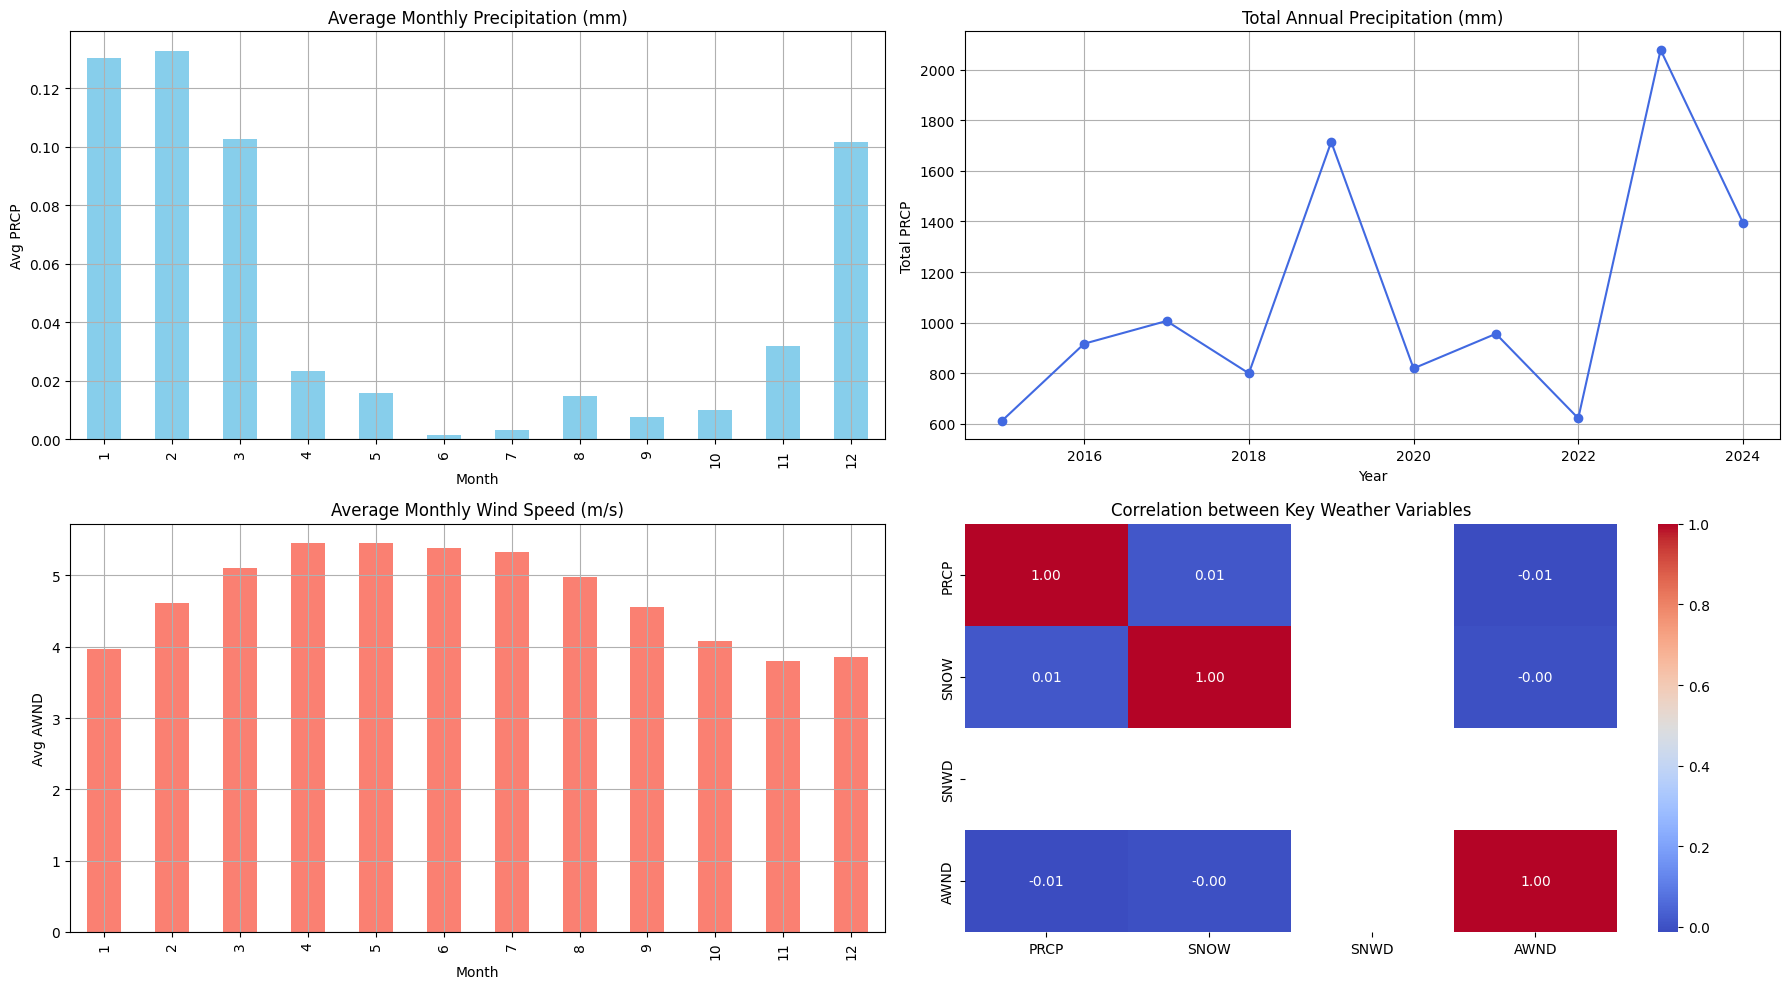

In [ ]:

monthly_prcp = df_weather.groupby('month')['PRCP'].mean()
annual_prcp = df_weather.groupby('year')['PRCP'].sum()
monthly_awnd = df_weather.groupby('month')['AWND'].mean()
core_cols = ['PRCP', 'SNOW', 'SNWD', 'AWND']
corr_matrix = df_weather[core_cols].corr()

plt.figure(figsize=(18, 10))

plt.subplot(2, 2, 1)
monthly_prcp.plot(kind='bar', color='skyblue')
plt.title('Average Monthly Precipitation (mm)')
plt.xlabel('Month')
plt.ylabel('Avg PRCP')
plt.grid(True)

plt.subplot(2, 2, 2)
annual_prcp.plot(marker='o', color='royalblue')
plt.title('Total Annual Precipitation (mm)')
plt.xlabel('Year')
plt.ylabel('Total PRCP')
plt.grid(True)

plt.subplot(2, 2, 3)
monthly_awnd.plot(kind='bar', color='salmon')
plt.title('Average Monthly Wind Speed (m/s)')
plt.xlabel('Month')
plt.ylabel('Avg AWND')
plt.grid(True)

plt.subplot(2, 2, 4)
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation between Key Weather Variables')

plt.tight_layout()
plt.show()

<ipython-input-35-014958d3dc4c>:28: UserWarning: Glyph 128293 (\N{FIRE}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128293 (\N{FIRE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


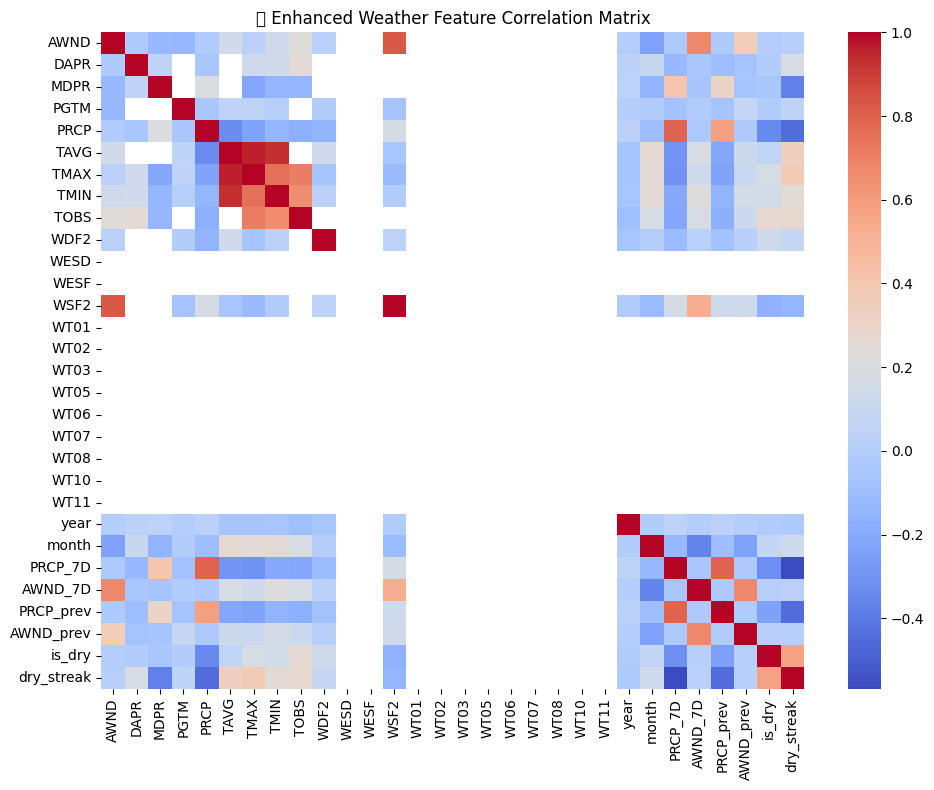

In [ ]:
# Assumes df_weather is preprocessed as in earlier steps

# Rolling features
df_weather['PRCP_7D'] = df_weather['PRCP'].rolling(window=7, min_periods=1).mean()
df_weather['AWND_7D'] = df_weather['AWND'].rolling(window=7, min_periods=1).mean()

# Lag features
df_weather['PRCP_prev'] = df_weather['PRCP'].shift(1)
df_weather['AWND_prev'] = df_weather['AWND'].shift(1)

# Dry spell count (days with PRCP == 0)
df_weather['is_dry'] = (df_weather['PRCP'] == 0).astype(int)
df_weather['dry_streak'] = df_weather['is_dry'].rolling(window=7, min_periods=1).sum()

# Drop rarely useful snow columns
df_weather = df_weather.drop(columns=['SNOW', 'SNWD'], errors='ignore')

# Select only numeric columns for correlation
numeric_cols = df_weather.select_dtypes(include='number')

# Correlation matrix
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))
sns.heatmap(numeric_cols.corr(),fmt=".2f", cmap='coolwarm')
plt.title("Enhanced Weather Feature Correlation Matrix")
plt.tight_layout()
plt.show()


<ipython-input-36-13a5fce2aa4d>:14: UserWarning: Glyph 128293 (\N{FIRE}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128293 (\N{FIRE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


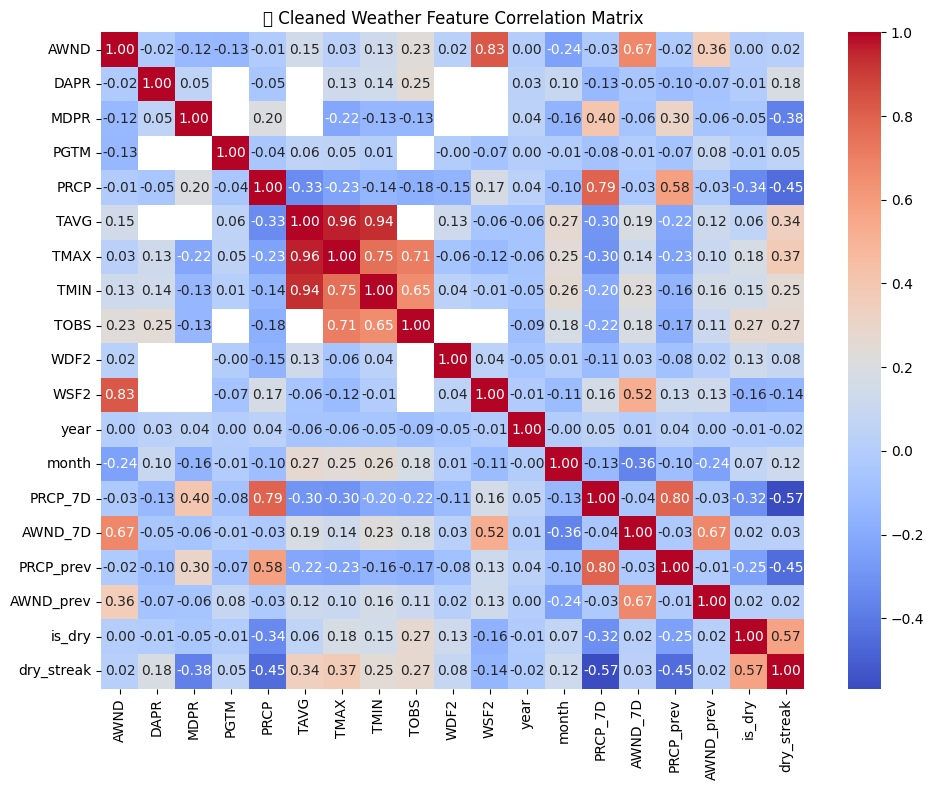

In [ ]:
# Drop constant columns (zero variance)
from sklearn.feature_selection import VarianceThreshold
selector = VarianceThreshold(threshold=0.0)
selector.fit(df_weather.select_dtypes(include='number'))
non_constant_cols = df_weather.select_dtypes(include='number').columns[selector.get_support()]

# Recompute correlation matrix with only useful columns
clean_corr = df_weather[non_constant_cols].corr()

# Plot clean version
plt.figure(figsize=(10, 8))
sns.heatmap(clean_corr, annot=True, fmt=".2f", cmap='coolwarm')
plt.title("Cleaned Weather Feature Correlation Matrix")
plt.tight_layout()
plt.show()


###Preprocessing Steps
- Combined two NOAA GHCN weather datasets (2015–2024)

- Parsed and cleaned DATE field

- Imputed missing values in core variables (PRCP, SNOW, SNWD, AWND) using monthly means

- Dropped low-value snow columns (SNOW, SNWD) since LA rarely sees snow

### Engineered temporal features:

- PRCP_7D, AWND_7D → 7-day rolling means

- PRCP_prev, AWND_prev → previous-day lag

- is_dry, dry_streak → dry spell indicators

###📊 Exploratory Data Analysis (EDA) Visuals
- Average Monthly Precipitation: Peaks in Dec–Feb, dry in Jul–Sep

- Total Annual Precipitation: Fluctuates year to year; dry years could link to fire activity

- Average Monthly Wind Speed: High in spring, low in winter

- Correlation Heatmap: Enhanced by removing constant/zero-variance columns

### 🧠 Key Takeaways from Correlation Matrix

- Variable Pair	Correlation	Insight
- TAVG ↔ TMAX/TMIN	0.94 / 0.75	Strong internal consistency between temp stats
- PRCP ↔ PRCP_7D	0.79	7-day rolling feature effectively tracks trends
- PRCP ↔ PRCP_prev	0.58	Precipitation persistence across days is real
- AWND ↔ WSF2	0.83	Wind speed fields strongly agree
- is_dry ↔ dry_streak	0.57	Rolling dry spell feature successfully working
- month ↔ other features	weak-to-none	Justifies keeping month for seasonality, not correlation

### Columns to Drop / Review
- WDF2, MDPR, PGTM, WTxx (very weak or undefined correlation)

- May contain mostly zeros or little variance in LA climate context

In [ ]:

output_path = '/content/drive/MyDrive/Projects/LA_Fire_Prediction/Data/intermediate/2- GHC - final_weather_data.csv'
df_weather.to_csv(output_path, index=False)
print(f"Final cleaned weather data saved to: {output_path}")


Final cleaned weather data saved to: /content/drive/MyDrive/Projects/LA_Fire_Prediction/Data/intermediate/2- GHC - final_weather_data.csv


#3) MODIS: Satellite Dataset

###**🌡️ 1. LST (Land Surface Temperature)**
MODIS Product: MOD11A2
What it measures:
The skin temperature of the Earth's surface — how hot the actual ground/vegetation is.

Unit: Kelvin (usually scaled ×100 in MODIS → needs conversion)

Update: Every 8 days, 1km resolution

Importance:

High LST = higher evaporation, vegetation stress

Often spikes before or during fire events

Used in drought, fire spread, and heat stress modeling

✅ You’re using LST_Day (daytime land temperature)


**-ve LST issue reason:**

LST is scaled as: LST (°C)=(value×0.02)−273.15
So: If a pixel value is 0, then: (0×0.02)−273.15=−273.15°C
This means 0 is actually the NoData or invalid value for our files

###🍃 **2. NDVI (Normalized Difference Vegetation Index)**
MODIS Product: MOD13Q1
What it measures:
How “green” the vegetation is — a proxy for plant health, density, and moisture.

NDVI=
(NIR+RED)/
(NIR−RED)
​

Range: −1 to +1

~0.2 = dry grass

~0.5+ = green vegetation

Update: Every 16 days, 250m resolution

Importance:

Fires are more likely in dry, brown areas (low NDVI)

Sharp NDVI drops may signal vegetation loss due to drought or fire

✅ NDVI is your go-to for vegetation dryness modeling.

###💧 **3. ET (Evapotranspiration)**
MODIS Product: MOD16A2
What it measures:
Total water loss to the atmosphere from soil evaporation + plant transpiration

Unit: kg/m² per 8-day

Update: Every 8 days, 500m resolution

Importance:

High ET = active plant growth, water usage

Low ET = vegetation stress or dormancy

Helps detect drying conditions and potential fire-prone zones

✅ Works great with LST and NDVI for early fire risk detection.

- LST	Surface heat	--> °C / Kelvin	--> Triggers drying, fire spread

- NDVI	Vegetation health	--> -1 to +1	--> Indicates fuel availability

- ET	Moisture loss via vegetation	--> mm / kg/m²	--> Shows dryness & stress

In [ ]:
!pip install rasterio

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 22.2/22.2 MB 40.1 MB/s eta 0:00:00


In [ ]:
import os
import glob
import rasterio
import pandas as pd
import numpy as np
from tqdm import tqdm

# Set your MODIS GeoTIFF directory
modis_dir = '/content/drive/MyDrive/Projects/LA_Fire_Prediction/Data/intermediate/3 - MODIS DATA'
tif_files = sorted(glob.glob(os.path.join(modis_dir, '*.tif')))
print(f"🔍 Total files found: {len(tif_files)}")

# Extract MOD11A2 (LST) only
records = []

for file in tqdm(tif_files):
    name = os.path.basename(file)

    # Only process MOD11A2 (LST Day)
    if 'MOD11A2' not in name:
        continue

    # Parse date from filename
    try:
        date_str = name.split('_doy')[1][:7]
        date = pd.to_datetime(date_str, format='%Y%j')
    except:
        continue

    # Read and process raster
    # Read and process raster
    # Read and process raster (FINAL FIXED VERSION)
    try:
        with rasterio.open(file) as src:
            data = src.read(1).astype(np.float32)

            # MODIS LST: 0 and 32767 are NoData, and anything < 7500 is often cloudy/invalid
            data[(data <= 7500) | (data >= 32767)] = np.nan

            # Convert to Celsius
            mean_val = np.nanmean(data) * 0.02 - 273.15
    except:
        continue



    records.append({'date': date, 'LST_Day_C': mean_val})

# Build and clean final DataFrame
df = pd.DataFrame(records)
df = df.sort_values('date').drop_duplicates(subset='date')

# Save the result
output_path = '/content/drive/MyDrive/Projects/LA_Fire_Prediction/MODIS_LST_TimeSeries.csv'
df.to_csv(output_path, index=False)

print(df.head())
print(f"Final clean LST time series saved to:\n{output_path}")


🔍 Total files found: 2196


 42%|████▏     | 921/2196 [02:33<01:13, 17.46it/s]<ipython-input-41-e906a6cebd1e>:41: RuntimeWarning: Mean of empty slice
  mean_val = np.nanmean(data) * 0.02 - 273.15
100%|██████████| 2196/2196 [03:38<00:00, 10.04it/s]

           date  LST_Day_C
0    2014-12-27  12.674622
4    2015-01-01  17.636139
924  2015-01-09        NaN
925  2015-01-17        NaN
1386 2015-01-25        NaN
✅ Final clean LST time series saved to:
/content/drive/MyDrive/Projects/LA_Fire_Prediction/MODIS_LST_TimeSeries.csv


In [ ]:
df[df['LST_Day_C'] < -100]


,date,LST_Day_C


Now not getting -ve temp of -272 whihc is not practical anymore. need to handle NaN values

In [ ]:
# Forward fill to preserve timeline
df['LST_Day_C'] = df['LST_Day_C'].fillna(method='ffill')


<ipython-input-43-8bc749e2b823>:2: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df['LST_Day_C'] = df['LST_Day_C'].fillna(method='ffill')


In [ ]:
df[df['LST_Day_C'] == "NaN"]


,date,LST_Day_C


In [ ]:

print(df.head())



           date  LST_Day_C
0    2014-12-27  12.674622
4    2015-01-01  17.636139
924  2015-01-09  17.636139
925  2015-01-17  17.636139
1386 2015-01-25  17.636139


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 460 entries, 0 to 921
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   date       460 non-null    datetime64[ns]
 1   LST_Day_C  460 non-null    float32       
dtypes: datetime64[ns](1), float32(1)
memory usage: 9.0 KB


In [ ]:
# Create full date range from fire/weather data
full_dates = pd.date_range(start='2014-12-27', end='2024-12-31', freq='D')

# Set index and reindex
df_daily = df.set_index('date').reindex(full_dates)
df_daily.index.name = 'date'

# Forward-fill missing days
df_daily['LST_Day_C'] = df_daily['LST_Day_C'].fillna(method='ffill')

# Reset index for merging
df_daily = df_daily.reset_index()


<ipython-input-47-87c1e4b8533b>:9: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_daily['LST_Day_C'] = df_daily['LST_Day_C'].fillna(method='ffill')


In [ ]:
df_daily.head()

,date,LST_Day_C
0,2014-12-27,12.674622
1,2014-12-28,12.674622
2,2014-12-29,12.674622
3,2014-12-30,12.674622
4,2014-12-31,12.674622


In [ ]:
df_daily.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3658 entries, 0 to 3657
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   date       3658 non-null   datetime64[ns]
 1   LST_Day_C  3658 non-null   float32       
dtypes: datetime64[ns](1), float32(1)
memory usage: 43.0 KB


In [ ]:
# Assuming df_daily contains daily LST values with a 'date' column
output_path = '/content/drive/MyDrive/Projects/LA_Fire_Prediction/Data/intermediate/3 - MODIS_LST_DAILY_CLEAN.csv'

df_daily.to_csv(output_path, index=False)

print(f"✅ Final daily LST saved to:\n{output_path}")
print(df_daily.head())


✅ Final daily LST saved to:
/content/drive/MyDrive/Projects/LA_Fire_Prediction/Data/intermediate/3 - MODIS_LST_DAILY_CLEAN.csv
        date  LST_Day_C
0 2014-12-27  12.674622
1 2014-12-28  12.674622
2 2014-12-29  12.674622
3 2014-12-30  12.674622
4 2014-12-31  12.674622


#4)Mering the dataset

In [ ]:
import pandas as pd

# Load datasets
fire_df = pd.read_csv('/content/drive/MyDrive/Projects/LA_Fire_Prediction/Data/intermediate/1 - LA_Daily_Fire_Labels.csv')
weather_df = pd.read_csv('/content/drive/MyDrive/Projects/LA_Fire_Prediction/Data/intermediate/2- GHC - final_weather_data.csv')
lst_df = pd.read_csv('/content/drive/MyDrive/Projects/LA_Fire_Prediction/Data/intermediate/3 - MODIS_LST_DAILY_CLEAN.csv')

# 🔁 Rename date columns to 'date'
fire_df = fire_df.rename(columns={'IGNITION_DATE': 'date'})
weather_df = weather_df.rename(columns={'DATE': 'date'})
# lst_df already has 'date'

# 🕒 Convert to datetime
fire_df['date'] = pd.to_datetime(fire_df['date'])
weather_df['date'] = pd.to_datetime(weather_df['date'])
lst_df['date'] = pd.to_datetime(lst_df['date'])

# ✅ Now ready to merge


In [ ]:
print(fire_df.columns)
print(weather_df.columns)
print(lst_df.columns)


Index(['date', 'fire_count', 'Fire_Occurred'], dtype='object')
Index(['STATION', 'NAME', 'date', 'AWND', 'DAPR', 'MDPR', 'PGTM', 'PRCP',
       'TAVG', 'TMAX', 'TMIN', 'TOBS', 'WDF2', 'WESD', 'WESF', 'WSF2', 'WT01',
       'WT02', 'WT03', 'WT05', 'WT06', 'WT07', 'WT08', 'WT10', 'WT11', 'year',
       'month', 'PRCP_7D', 'AWND_7D', 'PRCP_prev', 'AWND_prev', 'is_dry',
       'dry_streak'],
      dtype='object')
Index(['date', 'LST_Day_C'], dtype='object')


In [ ]:
# Merge all three on 'date'
merged_df = fire_df.merge(weather_df, on='date', how='left')
merged_df = merged_df.merge(lst_df, on='date', how='left')

# Filter to dates with full data (e.g., 2015+)
ml_df = merged_df[merged_df['date'] >= '2015-01-01'].dropna()

# Reset index
ml_df = ml_df.reset_index(drop=True)

# Save final merged dataset
output_path = '/content/drive/MyDrive/Projects/LA_Fire_Prediction/FINAL_LA_FIRE_ML_DATA.csv'
ml_df.to_csv(output_path, index=False)

print(f"✅ Final ML dataset saved to:\n{output_path}")
print("🔍 Shape:", ml_df.shape)
print(ml_df.head())


✅ Final ML dataset saved to:
/content/drive/MyDrive/Projects/LA_Fire_Prediction/FINAL_LA_FIRE_ML_DATA.csv
🔍 Shape: (0, 36)
Empty DataFrame
Columns: [date, fire_count, Fire_Occurred, STATION, NAME, AWND, DAPR, MDPR, PGTM, PRCP, TAVG, TMAX, TMIN, TOBS, WDF2, WESD, WESF, WSF2, WT01, WT02, WT03, WT05, WT06, WT07, WT08, WT10, WT11, year, month, PRCP_7D, AWND_7D, PRCP_prev, AWND_prev, is_dry, dry_streak, LST_Day_C]
Index: []

[0 rows x 36 columns]


In [ ]:
import pandas as pd

# Load cleaned CSVs
fire_df = pd.read_csv('/content/drive/MyDrive/Projects/LA_Fire_Prediction/intermediate/1 - LA_Daily_Final_Fire_Labels.csv')
weather_df = pd.read_csv('/content/drive/MyDrive/Projects/LA_Fire_Prediction/intermediate/2 - GHC - final_weather_data.csv')
lst_df = pd.read_csv('/content/drive/MyDrive/Projects/LA_Fire_Prediction/intermediate/3 - MODIS_LST_DAILY_CLEAN.csv')

# 🔁 Rename date columns
fire_df = fire_df.rename(columns={'IGNITION_DATE': 'date'})
weather_df = weather_df.rename(columns={'DATE': 'date'})

# 🕒 Convert to datetime
fire_df['date'] = pd.to_datetime(fire_df['date'])
weather_df['date'] = pd.to_datetime(weather_df['date'])
lst_df['date'] = pd.to_datetime(lst_df['date'])

# 🔗 Merge all datasets
merged_df = fire_df.merge(weather_df, on='date', how='left')
merged_df = merged_df.merge(lst_df, on='date', how='left')

# ✅ Filter to usable range (2015+) and only drop critical nulls
ml_df = merged_df[merged_df['date'] >= '2015-01-01']
ml_df = ml_df.dropna(subset=['LST_Day_C', 'PRCP', 'AWND', 'Fire_Occurred'])

# ♻️ Reset index and save
ml_df = ml_df.reset_index(drop=True)

# 💾 Save final file
output_path = '/content/drive/MyDrive/Projects/LA_Fire_Prediction/FINAL_LA_FIRE_ML_DATA.csv'
ml_df.to_csv(output_path, index=False)

# ✅ Done
print(f"✅ Final ML dataset saved to:\n{output_path}")
print("📊 Shape:", ml_df.shape)
print(ml_df.head())


✅ Final ML dataset saved to:
/content/drive/MyDrive/Projects/LA_Fire_Prediction/FINAL_LA_FIRE_ML_DATA.csv
📊 Shape: (13871, 36)
        date  fire_count  Fire_Occurred      STATION  \
0 2015-05-03           1              1  US1CALA0003   
1 2015-05-03           1              1  USW00003167   
2 2015-05-03           1              1  USR0000CACT   
3 2015-05-03           1              1  US1CALA0009   
4 2015-05-03           1              1  USC00047776   

                                 NAME      AWND  DAPR  MDPR  PGTM      PRCP  \
0              TORRANCE 2.8 SW, CA US  5.448088   NaN   NaN   NaN  0.000000   
1  HAWTHORNE MUNICIPAL AIRPORT, CA US  7.610000   NaN   NaN   NaN  0.000000   
2             ACTON CALIFORNIA, CA US  5.448088   NaN   NaN   NaN  0.015714   
3         SHERMAN OAKS 1.7 ENE, CA US  5.448088   NaN   NaN   NaN  0.000000   
4        SAN GABRIEL CANYON PH, CA US  5.448088   NaN   NaN   NaN  0.000000   

   ...  WT11    year  month   PRCP_7D   AWND_7D  PRCP_prev  A

In [ ]:
ml_df.tail()

,date,fire_count,Fire_Occurred,STATION,NAME,AWND,DAPR,MDPR,PGTM,PRCP,...,WT11,year,month,PRCP_7D,AWND_7D,PRCP_prev,AWND_prev,is_dry,dry_streak,LST_Day_C
13866,2023-11-30,1,1,USW00093134,"LOS ANGELES DOWNTOWN USC, CA US",0.890000,NaN,NaN,NaN,0.000000,...,NaN,2023.0,11.0,0.004578,3.256396,0.000000,2.910000,1.0,6.0,22.970703
13867,2023-11-30,1,1,USC00047785,"SAN GABRIEL FIRE DEPARTMENT, CA US",3.798954,NaN,NaN,NaN,0.000000,...,NaN,2023.0,11.0,0.004578,3.256396,0.000000,0.890000,1.0,6.0,22.970703
13868,2023-11-30,1,1,USR0000CBEV,"BEVERLY HILLS CALIFORNIA, CA US",3.798954,NaN,NaN,NaN,0.032043,...,NaN,2023.0,11.0,0.009155,3.256396,0.000000,3.798954,0.0,5.0,22.970703
13869,2023-11-30,1,1,US1CALA0064,"LOS ANGELES 2.6 NW, CA US",3.798954,NaN,NaN,NaN,0.050000,...,NaN,2023.0,11.0,0.016298,3.256396,0.032043,3.798954,0.0,4.0,22.970703
13870,2023-11-30,1,1,USW00093197,"SANTA MONICA MUNICIPAL AIRPORT, CA US",3.580000,NaN,NaN,NaN,0.000000,...,NaN,2023.0,11.0,0.011720,3.225117,0.050000,3.798954,1.0,5.0,22.970703


In [ ]:
ml_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13871 entries, 0 to 13870
Data columns (total 36 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   date           13871 non-null  datetime64[ns]
 1   fire_count     13871 non-null  int64         
 2   Fire_Occurred  13871 non-null  int64         
 3   STATION        13871 non-null  object        
 4   NAME           13871 non-null  object        
 5   AWND           13871 non-null  float64       
 6   DAPR           26 non-null     float64       
 7   MDPR           26 non-null     float64       
 8   PGTM           91 non-null     float64       
 9   PRCP           13871 non-null  float64       
 10  TAVG           2954 non-null   float64       
 11  TMAX           6477 non-null   float64       
 12  TMIN           6470 non-null   float64       
 13  TOBS           2101 non-null   float64       
 14  WDF2           1830 non-null   float64       
 15  WESD           230 

In [ ]:
# Drop sparse/uninformative columns
drop_cols = [
    'DAPR', 'MDPR', 'PGTM', 'TAVG', 'TOBS', 'WDF2', 'WESD', 'WESF', 'WSF2',
    'WT01', 'WT02', 'WT03', 'WT05', 'WT06', 'WT07', 'WT08', 'WT10', 'WT11'
]

ml_df_cleaned = ml_df.drop(columns=drop_cols)


In [ ]:
# 🔗 Merge fire + weather data on 'date'
merged_df = pd.merge(fire_df, weather_df, on='date', how='left')

# 🔗 Merge with LST data
merged_df = pd.merge(merged_df, lst_df, on='date', how='left')

# Save the final merged dataset
output_path = '/content/drive/MyDrive/Projects/LA_Fire_Prediction/Data/final/FINAL_LA_FIRE_ML_DATA_MERGED.csv'
merged_df.to_csv(output_path, index=False)

# Show final shape and label distribution
print("Merge complete!")
print("Final Shape:", merged_df.shape)
print("Fire_Occurred distribution:\n", merged_df['Fire_Occurred'].value_counts())


✅ Merge complete!
📊 Final Shape: (225016, 36)
🔥 Fire_Occurred distribution:
 Fire_Occurred
0    210536
1     14480
Name: count, dtype: int64


In [ ]:
merged_df.head()

,date,fire_count,Fire_Occurred,STATION,NAME,AWND,DAPR,MDPR,PGTM,PRCP,...,WT11,year,month,PRCP_7D,AWND_7D,PRCP_prev,AWND_prev,is_dry,dry_streak,LST_Day_C
0,2014-12-27,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12.674622
1,2014-12-28,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12.674622
2,2014-12-29,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12.674622
3,2014-12-30,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12.674622
4,2014-12-31,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12.674622
